X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Model compiled successfully and ready to be trained.
Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 1.8031 - acc: 0.8240 - val_loss: 0.1924 - val_acc: 0.9444
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2785 - acc: 0.9216 - val_loss: 0.1219 - val_acc: 0.9628
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1820 - acc: 0.9461 - val_loss: 0.0870 - val_acc: 0.9728
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1438 - acc: 0.9566 - val_loss: 0.0750 - val_acc: 0.9776
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1166 - acc: 0.9634 - val_loss: 0.0684 - val_acc: 0.9788
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1021 - acc: 0.9685 - val_loss: 0.0619 - val_acc: 0.9804
Epoch 7/20
469/469 [==============================]

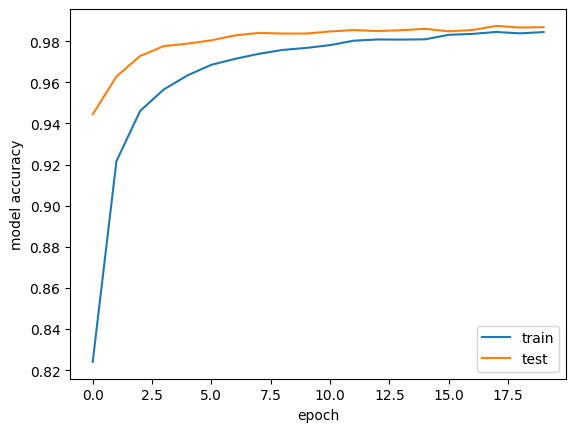

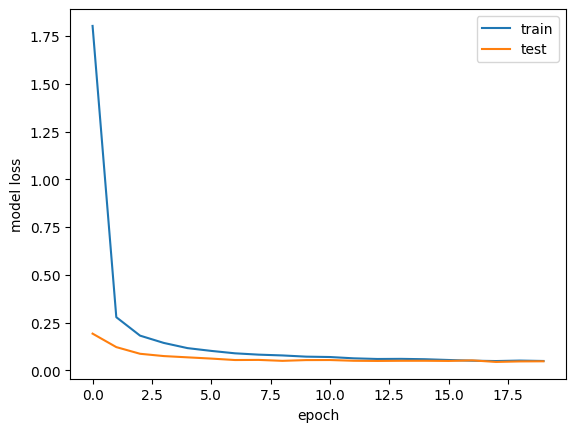

In [23]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=None,padding='valid'))
    model.add(Dropout(0.5))
    
    #model.add(Conv2D(10, kernel_size=(3, 3),activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2),strides=None,padding='valid'))
              
    #Flattening
    model.add(Flatten())
    model.add(Dense(128,'relu'))
    model.add(Dense(num_classes,'softmax'))

    return model

def compile_model():
    # create the model
    model=create_CNN()
    # compile the model
    model.compile(loss=keras.losses.sparse_categorical_crossentropy,#Ci vuole la sparse_categorical_crossentropy 
                 #altrimenti non funziona, questo perche?
                  optimizer='ADAM',
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

# training parameters
batch_size = 128
epochs = 20

# create the deep neural net
model_CNN = compile_model()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()